# 非贝叶斯高斯混合模型

首先我们应该知道，给参数设了先验（把它看成随机变量）才能讨论后验分布，否则只能讨论似然度。而似然度直接决定了大部分后验部分信息：

$$
P(\theta \mid X) = \frac{P(X \mid \theta)P(\theta)}{P(X)}
$$

贝叶斯设定的高斯混合模型将非贝叶斯高斯混合模型的参数全部随机化了一层（当然可以设想将贝叶斯模型先验的参数又随机化，不过没这么做），
然而非贝叶斯高斯混合模型里却也有一个随机化的“参数”（隐变量），即某个数据所隶属的类，它们被看做从一个固定的离散分布所抽出，
从而我们可以讨论它们的后验分布，一般设的均匀分布。在贝叶斯的高斯混合模型中，这个固定的离散分布的和为1的P参数被看成从一个狄利克雷分布的
先验分布所抽出来的。

它的生成模型如下所述：

对$N$个数据点按一离散分布独立的从$k$个类中抽出一个（隶属隐变量），然后每个数据点根据所选择的类对应的固定分布中抽一个可观测数据。
从而我们可以定义“完全数据概率分布/似然”

$$
p(X,Z \mid \Theta) = \prod_{i=1}^N p(x_i,z_i, \mid \Theta) = \prod_{i=1}^N p(z_i \mid \Theta) p(x_i \mid z_i,\Theta)
$$

其中$p(z_i \mid \Theta)$即$N$个数据第$i$中抽到抽到$z_i$类的先验概率。$p(x_i \mid z_i,\Theta)$为给定特定隶属后的似然度。

参数集$\Theta$不包含隐变量$z_i$的取值，包含子总体的均值参数，协方差矩阵（如果没有事先给定）与那个固定的离散分布的参数向量。它本身的优化目标是
优化把$Z$边缘化掉的对数似然函数：
$$
\mathrm{argmax}_{\Theta} \quad p(X\mid \Theta)
$$


不难看出如果隐变量$z_i$的值实际知道的话，则优化$p(X,Z\mid \Theta)$是个平凡的极大似然估计问题，梯度相关的算法很容易给出数值解。但事实并非如此，
而且这个边缘化通常没那么简单。考虑，

$$
p(X \mid \Theta) = \int_Z p(X,Z \mid \Theta) dZ
$$

注意这里虽然在给定$\Theta$和$X$的情况下我们可以简单的计算出这种$Z$的后验分布

$$
p(Z \mid X,\Theta) = \frac{p(Z,X \mid \Theta)}{p(X \mid \Theta)}
$$

可以看到虽然好像我们要计算上面说过不好算的边缘密度$p(X \mid \Theta)$，但因为我们的类是有限的，所以可以直接求分子和（完全似然函数）来边缘化。
类似ratio计算后验分布的技巧。

但这个后验分布本身和计算最优$\Theta$却没什么关系，目标就是把完全似然函数的$Z$积分掉的$p(X \mid \Theta)$，这个东西虽然表示不出来，
但它本身和后验分布没有关系。否则不难看出如果我们真有后验分布的话我们可以直接得到$p(X \mid \Theta)$。

从参数高斯模型的表述方式来看，我们倒是直接知道完全似然的另一个方向的积分结果，因为它是直接定义出来的：

$$
p(Z \mid \Theta) = \int_X p(X,Z \mid \Theta) dX
$$

有时候这个积掉隐变量的过程也没看上去那么难，下面我们演示一个理论上的通过边缘分布直接估计出结果，再假定估计值为真，看看$Z$的后验分布。
(对于参数贝叶斯模型来看，我们无法像贝叶斯那样讨论$p(Z \mid X)) = \int_\Theta p(Z,\Theta \mid X)$这种后验分布，
因为参数的取值会带来完全不一样的结果。而且关于这种取法怎么取我们并没有任何信息，从而只能选择一个取值观察它们的后果，这里我们选择
边缘最大似然估计的结果来观察）

我们设一个隐变量$Z \sim N(\theta,1)$，然后可观测变量$X \sim N(Z,1)$，现在我们观测到$X=1$，求$\theta$的极大似然估计值与$z$在此参数设定
下的后验概率分布。首先完全似然函数可表示为

$$
p(x,z \mid \theta) = p(z \mid \theta) p(x \mid z,\theta) = 
\frac{1}{\sqrt{2\pi}}e^{ -\frac{(z-\theta)^2}{2} } \frac{1}{\sqrt{2\pi}}e^{ -\frac{(x-z)^2}{2} } =
\frac{1}{2\pi} e^{- \frac{1}{2} (z^2 + \theta^2 - 2z\theta + x^2 + z^2 -2zx)}
$$

这个积分虽然是个常见积分但还是算了。。把$z$分布换成$P(z=1)=p,P(Z=-1)=1-p$，从而

$$
p(x,z \mid \theta) = p(z \mid \theta) p(x \mid z,\theta) = 
\begin{cases}
p \frac{1}{\sqrt{2\pi}}e^{ -\frac{(x-1)^2}{2} } & x=1 \\
(1-p) \frac{1}{\sqrt{2\pi}}e^{ -\frac{(x+1)^2}{2} } & x=-1
\end{cases}
$$

$$
p(x \mid \Theta) = \sum_z p(x,z \mid \Theta) = p(x,z=1 \mid \Theta) + p(x,z=-1 \mid \Theta) = 
p \frac{1}{\sqrt{2\pi}}e^{ -\frac{(x-1)^2}{2} } + (1-p) \frac{1}{\sqrt{2\pi}}e^{ -\frac{(x+1)^2}{2} }
$$

$$
\frac{\partial}{\partial p} p(x \mid \Theta) = 
\frac{1}{\sqrt{2\pi}}e^{ -\frac{(x-1)^2}{2} } - \frac{1}{\sqrt{2\pi}}e^{ -\frac{(x+1)^2}{2} }
$$

代入$x=1$时这个函数恒为正，于是我们取$p=1$作为极大似然估计值，而后验分布由于$P(Z=-1)=0$故为以100%概率取Z=1，看起来这并不是个好例子。

不过归根结底，我们可以使用这个套路。而我们并不经常这么算的原因除了积分困难以外，即使我们不是积分而是求和，可以看到上面的和形式导致我们不能
取对数，这在数值上会带来一些明显的麻烦，毕竟对数并不止用来保持单调性。

一般EM算法提供了一种解决方法，它通过某种方式导出了一个完全似然函数$p(X,Z \mid \Theta)$的下界$B(X\mid \Theta)$,如形式暗示的显示的那样，
它不依赖$Z$。且在一个参数取值上与p相同，即：

$$
B(X \mid \Theta) \le p(X,Z \mid \Theta) \\
B(X \mid \Theta_0) = p(X,Z \mid \Theta_0)
$$

那么在当前迭代中我们已有$\Theta_0$,那么通过最大化$B(X \mid \Theta)$找到的$\Theta_1$有

$$
p(X,Z \mid \Theta_1) \ge B(X\mid \Theta_1) \ge B(X\mid \Theta_0) = p(X,Z \mid \Theta_0)
$$

从而这步迭代就找到一个更好的$\Theta$，不断迭代以找到局部最优解，容易找到反例显示它不能保障找到全局最优解，不过可以保障收敛。
这种优化下界的方式是诱导迭代算法的一个常见讨论，变分推断里我们也会见到类似的情况。

在有$\Theta_0$时候构造B就需要用到那个假定$\Theta$正确算出来的$Z$的精确后验分布$p(z \mid X,\Theta)$，
虽然因为这个假定一般不正确算出来的其实是个含糊的东西，不过我们姑且可以说它应当越来越靠近正确。

具体来说，B函数是这个样子：

$$
B(\Theta \mid \Theta_0) = L(\Theta_0,Z) + \sum_z P(Z \mid X,\Theta_0) \log 
\frac{p(X \mid Z,\Theta)P(Z \mid \Theta)}{p(Z \mid X,\Theta_0)p(x \mid \Theta_0)}
$$

虽然与$Z$有关，但优化时与$Z$无关，写出这个项是为了$\theta_0$时值的确相等，其实我们想要的显然是某个共变关系，这里只是凑证明用。
归根揭底，最终要最大化的式子是：

$$
\sum_z p(Z \mid X,\Theta) \log p(X,Z \mid \Theta)
$$

这个东西可以看成一个期望

$$
E_z [\log p(X,Z \mid \Theta) \mid X,\Theta]
$$

或者用EM算法 wiki那个两类高斯的例子的符号

$$
Q(\theta \mid \theta^{(t)}) = \mathrm{E}_{Z \mid X,\theta^{(t)}} [ \log L(\theta;x,Z)]
$$

简而言之，它在钦定$\theta$后将给定X条件确定了新的$Z$的后验分布后，此时完全似然函数只有$Z$一个变量，于是我们对对数似然函数求期望。
对数似然函数本身可以分解成几个独立乘积，然后被对数化和，期望算子可以移进各和中，即：

$$
Q(\theta \mid \theta_0) = \mathrm{E}_{Z \mid X,\theta_0} [ \log L(\theta;x,Z)] = 
\mathrm{E}_{Z \mid X,\theta_0} [ \log \prod_{i=1}^n L(\theta;x_i,Z_i)] = 
\mathrm{E}_{Z \mid X,\theta_0} [ \sum_{i=1}^n \log L(\theta;x_i,Z_i)] =
\sum_{i=1}^n  \mathrm{E}_{Z \mid X,\theta_0} [ \log L(\theta;x_i,Z_i)]
$$

由于每个$Z$分量作为随机变量只有有限的取值，可以直接展开成加权和，即：
$$
Q(\theta \mid \theta_0) = \sum_{i=1}^n \sum_{j=1}^k \log L(\theta;X_i=x_i,Z_i=j) p(Z_i=j \mid \theta,X_i = x_i)
$$

其中左边的项的计算方式就是直接展开，即:

$$
\log L(\theta;X_i=x_i,Z_i=j) = \log L(\theta;X_i=x_i \mid Z_i= j) L(\theta ; Z_i=j)
$$

其左边在高斯混合模型中涉及将X_i的分布换为$j$对应的分布再把$x_i$代进去。而$L(\theta,Z_i=j)$就是抽到$j$类的“先验概率”，这个概率也是
要估计的参数之一。右边的项，即概率权重，本来计算会比较困难：

$$
p(Z_i = j \mid \theta,X_i=x_i) = \frac{p(Z_i=j,X_i=x_i \mid \theta)}{p(X_i=x_i \mid \theta)}
$$

难点当然是那个分母，如果真知道这个都可以直接优化这个边缘似然函数了?但我们实际真可以算

$$
p(X_i = x_i \mid \theta) = \sum_{j=1}^k p(X_i=x_i,Z_i=j \mid \theta)
$$

那之前的不能算是什么意思呢？一是那时候我们还没假设它是离散取值的，积分本身可能不好算，其次那时候是个随机向量$X$的整体的取值而不是分量的
取值，这意味着10个分类的1000个样本要求一个$10^{1000}$规模的和，这当然是不可行的，我们在之前的推导隐含的一个独立假设做得分解起了决定性作用。

若都以我们可以直接计算的值重写原式的话：

$$
Q(\theta \mid \theta_0) = \sum_{i=1}^n\sum_{j=1}^k\ \left(\log P(X_i=x_i \mid Z_i=j,\theta) + \log P(Z_i=j \mid \theta) \right)
\frac{p(X_i=x_i \mid Z_i=j, \theta ) p(Z_i=j \mid \theta)}{\sum_{t=1}^k p(X_i=x_i \mid \theta,Z_t=t)p(Z_t=t \mid \theta)}
$$

于是我们可以以此计算出依赖于$\theta_0$，的一个以条件化$Z$加权的对数似然函数的值，此时真正的变量是上面的计算时看做确定的$\theta$，
这个计算可以看做是一个期望计算，故称为E步骤，把$\theta$又看成变量取最大化的过程则是$M$步骤。因为E步骤计算出一个“函数”这个事不好表示，
一般编程时这时其实是计算出那个$p(Z_i=j \mid \theta,X_i=x_i)$，记为$T_{j,i}^{(t)}$矩阵，另外
$$
Q(\theta \mid \theta_0) = \mathrm{E}_{Z \mid X,\theta_0} [ \log L(\theta;x,Z)]
$$
这个记法还暗示只有$Z$的后验分布经过$\theta_0$的指定的计算，即这个函数的权重——Z的概率是用$\theta=\theta_0$假定算出来的，但是该函数本身
并未钦定$\theta$的值，从而$\log$那一部分并不需要把$\theta$换成$\theta_0$，并且它成为M step的$\theta$起作用的地方。所以这个函数
本身可以看成给定$\theta_0$与另一个$\theta$赋值才能映射到一个似然度上。

## 混合高斯模型的三种设定

### 分类作为参数的设定

这里EM算法并不是精确的，只是形式类似。即每步直接划定一个数据点为一个类型（而不是给定$\theta,X$的后验分布），然后以这个类型直接估计这个总体
的参数反复迭代，其实是k-means算法。参数比参数高斯模型少了$p(Z_i=j \mid \theta)$这些取类型的先验分布
（这个分布本身是刻画几个类型所占的大致比例的，但k-means并不是生成模型，不需要这个信息）。



In [94]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')

In [23]:
_mus = [[2,2],[-2,-2.5],[-3,3]]
_covs = [np.diag([1,1]),np.diag([1.2,1.2]),np.diag([1.5,1.5])]

In [24]:
X_1 = stats.multivariate_normal(_mus[0],_covs[0]).rvs(size=50)
X_2 = stats.multivariate_normal(_mus[1],_covs[1]).rvs(size=100)
X_3 = stats.multivariate_normal(_mus[2],_covs[2]).rvs(size=150)

In [21]:
X = np.vstack([X_1,X_2,X_3])
X.shape

(300, 2)

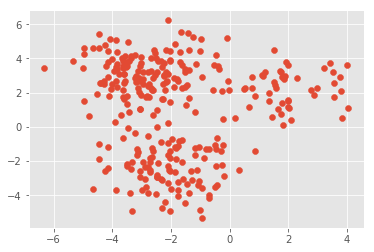

In [22]:
plt.scatter(X[:,0],X[:,1])

In [27]:
n = X.shape[0]
K = 3

In [18]:
Z = np.random.randint(3,size=300)

In [30]:
mus = np.empty([K,2])
covs = np.empty([K,2,2])

In [35]:
for i in range(3):
    mus[i] = X[Z==i].mean(axis=0)
    covs[i] = np.cov(X[Z==i,0],X[Z==i,1])

In [36]:
mus

array([[-1.93423752,  1.21312553],
       [-1.89656255,  1.12425683],
       [-1.5813203 ,  0.93160643]])

In [37]:
covs

array([[[ 4.28929734,  0.32150768],
        [ 0.32150768,  7.54404712]],

       [[ 3.75367343, -0.32147891],
        [-0.32147891,  7.76671553]],

       [[ 4.67040024, -0.02997763],
        [-0.02997763,  7.97147141]]])

In [41]:
likelihood = np.empty([n,K])

In [42]:
for i in range(K):
    likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)

In [45]:
np.mean(likelihood.argmax(axis=1) == Z)

0.37333333333333335

In [38]:
niter = 100

In [46]:
for i in range(niter):
    # fake E step: classify data pointer by current theta setting
    for i in range(K):
        likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)
    Z = likelihood.argmax(axis=1)
    # fake M step: get max likelihood parameter to match given Z
    for i in range(3):
        mus[i] = X[Z==i].mean(axis=0)
        covs[i] = np.cov(X[Z==i,0],X[Z==i,1])

In [47]:
mus

array([[-2.34620844,  0.03239891],
       [-3.39701034,  3.21489303],
       [ 0.55165335, -0.09575612]])

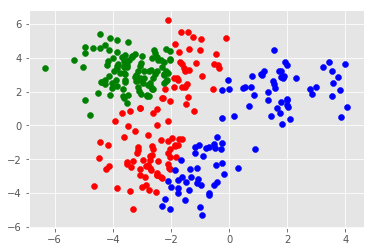

In [49]:
for i,c in zip(range(3),'rgb'):
    plt.scatter(X[Z==i,0],X[Z==i,1],color=c)
plt.show()

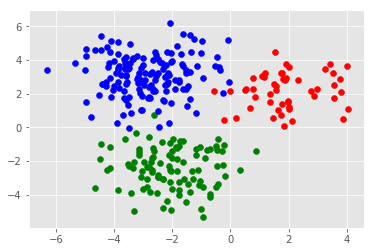

In [50]:
_Z = np.zeros(300)
_Z[50:150] = 1
_Z[150:]=2

for i,c in zip(range(3),'rgb'):
    plt.scatter(X[_Z==i,0],X[_Z==i,1],color=c)
plt.show()

In [51]:
_mus

[[2, 2], [-2, -2.5], [-3, 3]]

In [52]:
mus

array([[-2.34620844,  0.03239891],
       [-3.39701034,  3.21489303],
       [ 0.55165335, -0.09575612]])

## 参数混合高斯模型

参数混合高斯模型是标准的模型，它的隶属变量看成隐变量而不是参数，参数本身还是参数，到贝叶斯参数自己也有先验分布了。

In [61]:
Z = stats.dirichlet([1,1,1]).rvs(size=300) # Though we use dirichlet distribution to generate randomized initial value for Z, we don't have assurmed  it as prior distribution for Z 

In [60]:
Z[:3] # In real iteration, variable Z represent posterior distribution given condition X and parameter Theta

array([[ 0.81613715,  0.03981546,  0.14404739],
       [ 0.85406732,  0.00133872,  0.14459396],
       [ 0.27616568,  0.3918384 ,  0.33199592]])

In [165]:
alphas = np.ones(3)/3
# mus =
# covs = 

In [112]:
def parameter_encode(mus,covs,alphas):
    # sadly, to ensure the semi-positive matrix property can hold in optimizing, we must reparamize the covs by AA' = B
    roots = np.empty([K,2,2])
    for i in range(K):
        eig_value,eig_matrix = scipy.linalg.eig(covs[i])
        eig_value,eig_matrix = eig_value.real,eig_matrix.real
        root = eig_matrix @ np.diag(np.sqrt(eig_value))
        roots[i] = root
    return np.concatenate([mus.flatten(),roots.flatten(),alphas.flatten()])

In [77]:
parameter_encode(mus,covs,alphas)

array([ -2.34620844e+00,   3.23989116e-02,  -3.39701034e+00,
         3.21489303e+00,   5.51653351e-01,  -9.57561157e-02,
         9.41626828e-01,   1.81469624e+00,   1.81469624e+00,
         7.78307243e+00,   7.15101563e-01,  -4.13807829e-02,
        -4.13807829e-02,   9.00513634e-01,   3.07312356e+00,
         3.97238135e+00,   3.97238135e+00,   7.65281921e+00,
         2.39462540e-01,   7.57507589e-01,   3.02987076e-03])

In [113]:
def parameter_decode(code):
    mus = code[:3*2].reshape([3,2])
    roots = code[3*2 : 3*2+3*4].reshape([3,2,2])
    alphas = code[3*2+3*4:].reshape(3)
    covs = np.empty([K,2,2])
    for i in range(K):
        covs[i,:,:] = roots[i,:,:] @ roots[i,:,:].T
    return mus,covs,alphas

In [114]:
parameter_decode(parameter_encode(np.array(_mus),np.array(_covs),np.ones(3)/3))

(array([[ 2. ,  2. ],
        [-2. , -2.5],
        [-3. ,  3. ]]), array([[[ 1. ,  0. ],
         [ 0. ,  1. ]],
 
        [[ 1.2,  0. ],
         [ 0. ,  1.2]],
 
        [[ 1.5,  0. ],
         [ 0. ,  1.5]]]), array([ 0.33333333,  0.33333333,  0.33333333]))

In [85]:
likelihood = np.empty([n,K])

for i in range(K):
    likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)


In [86]:
full_likelihood = likelihood * alphas

In [89]:
log_likelihood = np.log(full_likelihood)

In [92]:
np.sum(log_likelihood * Z)

-3894.4588091862906

In [115]:
def f(code):
    mus,covs,alphas = parameter_decode(code)
    likelihood = np.empty([n,K])
    for i in range(K):
        likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)
    full_likelihood = likelihood * alphas
    log_likelihood = np.log(full_likelihood)
    return np.sum(log_likelihood * Z) # note: Z is not in code but context variable
    

In [116]:
x0 = parameter_encode(mus,covs,alphas)

In [168]:
parameter_decode(x0)

(array([[-2.34620844,  0.03239891],
        [-3.39701034,  3.21489303],
        [ 0.55165335, -0.09575612]]), array([[[ 0.94162683,  1.81469624],
         [ 1.81469624,  7.78307243]],
 
        [[ 0.71510156, -0.04138078],
         [-0.04138078,  0.90051363]],
 
        [[ 3.07312356,  3.97238135],
         [ 3.97238135,  7.65281921]]]), array([ 0.23946254,  0.75750759,  0.00302987]))

In [125]:
f(x0)

-3894.4588091862911

In [128]:
def alphas_cons(code):
    mus,covs,alphas = parameter_decode(code)
    return alphas.sum()-1

cons = ({
    'fun':alphas_cons,
    'type':'eq'
},)

In [160]:
res = scipy.optimize.minimize(lambda code:-f(code),x0,constraints=cons)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [163]:
parameter_decode(res.x)

(array([[-1.93522423,  0.88311609],
        [-1.74289486,  1.20702457],
        [-1.76343424,  1.18808544]]), array([[[ 3.45734588, -0.219667  ],
         [-0.219667  ,  8.17092897]],
 
        [[ 4.28415605,  0.02259673],
         [ 0.02259673,  7.85318634]],
 
        [[ 4.80305059,  0.08321487],
         [ 0.08321487,  7.03586418]]]), array([ 0.32222584,  0.32338936,  0.3543848 ]))

In [166]:
mus,covs,alphas

(array([[-2.34620844,  0.03239891],
        [-3.39701034,  3.21489303],
        [ 0.55165335, -0.09575612]]), array([[[ 0.94162683,  1.81469624],
         [ 1.81469624,  7.78307243]],
 
        [[ 0.71510156, -0.04138078],
         [-0.04138078,  0.90051363]],
 
        [[ 3.07312356,  3.97238135],
         [ 3.97238135,  7.65281921]]]), array([ 0.33333333,  0.33333333,  0.33333333]))

之前又把SB最小化看成最大化调了半天，我真是too young

In [169]:
mus,covs,alphas = parameter_decode(res.x)

In [170]:
likelihood = np.empty([n,K])

for i in range(K):
    likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)
full_likelihood = likelihood * alphas


In [172]:
Z = (full_likelihood.T/full_likelihood.sum(axis=1)).T # posterior distribution

In [173]:
for i in range(niter):
    # E step
    likelihood = np.empty([n,K])

    for i in range(K):
        likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)
    full_likelihood = likelihood * alphas
    Z = (full_likelihood.T/full_likelihood.sum(axis=1)).T # posterior distribution
    
    # M step
    
    def f(code):
        mus,covs,alphas = parameter_decode(code)
        likelihood = np.empty([n,K])
        for i in range(K):
            likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(X)
        full_likelihood = likelihood * alphas
        log_likelihood = np.log(full_likelihood)
        return np.sum(log_likelihood * Z) # note: Z is not in code but context variable
    
    x0 = parameter_encode(mus,covs,alphas)
    
    def alphas_cons(code):
        mus,covs,alphas = parameter_decode(code)
        return alphas.sum()-1

    cons = ({
        'fun':alphas_cons,
        'type':'eq'
    },)
    
    res = scipy.optimize.minimize(lambda code:-f(code),x0,constraints=cons)
    mus,covs,alphas = parameter_decode(res.x)
    

D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log
D:\anaconda\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [175]:
__Z = Z.argmax(axis=1)

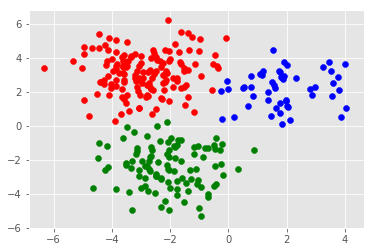

In [176]:
for i,c in zip(range(3),'rgb'):
    plt.scatter(X[__Z==i,0],X[__Z==i,1],color=c)
plt.show()

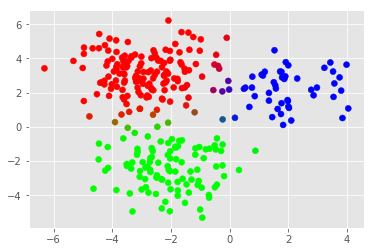

In [180]:
plt.scatter(X[:,0],X[:,1],color=Z)
plt.show()

In [181]:
_A = np.linspace(-7,5,100)
_B = np.linspace(-5,7,100)

A,B = np.meshgrid(_A,_B)


In [215]:
grid_likelihood = np.empty([100*100,3])
AB_mat = np.array([A.flatten(),B.flatten()]).T
for i in range(3):
    grid_likelihood[:,i] = stats.multivariate_normal(mus[i],covs[i]).pdf(AB_mat)
grid_likelihood *= alphas
grid_likelihood = (grid_likelihood.T/grid_likelihood.sum(axis=1)).T


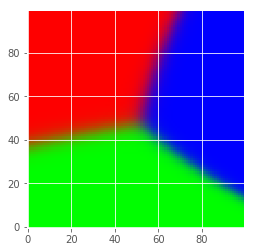

In [219]:
plt.imshow(grid_likelihood.reshape([100,100,3]),origin='lower')


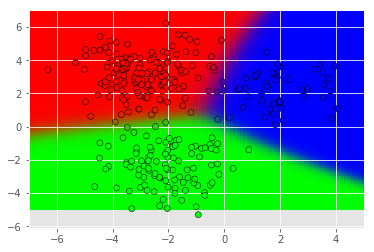

In [221]:
plt.imshow(grid_likelihood.reshape([100,100,3]), interpolation='nearest',
           extent=(A.min(), A.max(), B.min(), B.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(X[:,0],X[:,1],color=Z,edgecolors=(0, 0, 0))
plt.show()

In [214]:
grid_likelihood.reshape([100,100,3])[0,0,:]

array([  2.15029043e-14,   7.37266720e-07,   2.32804768e-22])

In [208]:
plt.cm.RdYlBu?

三种颜色混在一起看起来不太好看，我们看看sklearn例子里那些分类可视化主要是把几个类的概率图单独画出来

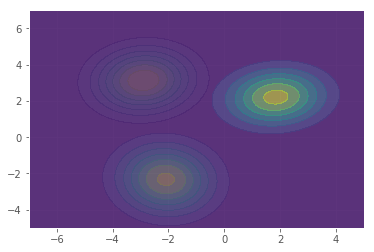

In [202]:
plt.contourf(A,B,grid_likelihood.reshape([100,100,3])[:,:,0],alpha=0.5)
plt.contourf(A,B,grid_likelihood.reshape([100,100,3])[:,:,1],alpha=0.5)
plt.contourf(A,B,grid_likelihood.reshape([100,100,3])[:,:,2],alpha=0.5)

In [200]:
plt.contourf?

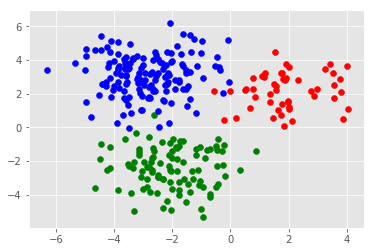

In [177]:
for i,c in zip(range(3),'rgb'):
    plt.scatter(X[_Z==i,0],X[_Z==i,1],color=c)
plt.show()

可以看出给出效果上相当于平滑的后验分布后（比较其对于分类非此即彼的k-means），效果不知道好到哪里去了。

## 贝叶斯设定

贝叶斯设定，参数设定的三个参数$\mu,\Sigma,\alpha$都有了先验分布。从而我们实际上已经给定了整个分布，我们唯一的问题就是从中采样
与在条件分布中采样了。所以EM算法没有直接的用武之地。

贝叶斯设定带来的后验分布的表示本身没什么意思

$$
p(\theta,Z \mid X) = \frac{p(X,Z,\theta)}{p(X)}
$$

或两个边缘分布
$$
p(\theta \mid X) = \frac{\int_Z p(X,Z,\theta) dZ}{p(X)}
$$

$$
p(Z \mid X) = \frac{\int_\theta p(X,Z,\theta) d\theta}{p(X)}
$$

这个$p(X)$按定义的解法$\int_{Z,\theta} p(X,Z,\theta)$通常不容易解，容易解的如完全本身通常是按定义搭建/计算的。

$$
p(X,Z,\theta) = p(X \mid Z,\theta) p(Z,\theta) = p(X \mid Z,\theta) p(Z \mid \theta) p(\theta)
$$

这里后三个通常是直接定义出来的。分层模型设定很容易产生此类结果。

由于后验分布的分析表示很难进行也没什么用处，直接到达我们的目的的另一条路径就是采样，基本只运用那三个定义的ratio方法来对条件分布进行采样。

下面我们直接采用对称的proposal分布，其中类别就直接以比较大的概率保留原状态，以比较低的概率等概率跑到其他取值（但一开始的实现将使用
没有特别的原状态权重的版本，相当于全部都等概率在三种状态中取值，预计这么做效率会比较低。）期望向量就直接用独立正态分布跳跃。
协方差矩阵好像应当用某种winshart分布，不过比较麻烦而且属于相对细致末节的问题，我这里直接给出真实值不再进行参数推断（比较次的方法
是假定独立然后仅设一个或几个方差随机参数，不过没什么意义）。

用处不大的参数本身的先验（很快就会被数据淹没）设为

$$
\alpha \sim Diri(1,1,1) \\
\mu_{ij} \sim N(0,1) \\
$$

In [251]:
def log_alphas_prior_pdf(alphas):
    return np.log(stats.dirichlet([1,1,1]).pdf(alphas))
def log_mus_prior_pdf(mus):
    return np.sum(np.log(stats.norm(0,1).pdf(mus.flatten()))) # It implies numerical problem, may I need to log it to solve it.


In [252]:
def log_theta(mus,alphas):
    return log_alphas_prior_pdf(alphas) + log_mus_prior_pdf(mus)
def log_Z_pdf(Z,alphas):
    return np.sum(np.log(alphas[Z]))
def log_X_pdf(X,Z,mus,alphas):
    likelihood = np.empty([n,3])
    for i in range(3):
        likelihood = stats.multivariate_normal(mus[i],_covs[i]).pdf(X)
    return np.sum(np.log(likelihood[Z]))

In [253]:
def log_likelihood(X,Z,mus,alphas):
    return log_X_pdf(X,Z,mus,alphas) + log_Z_pdf(Z,alphas) + log_theta(mus,alphas)

In [380]:
def Z_q(Z):
    #return np.random.randint(3,size=n) # It may can be improved by a real conditional distribution
    test = np.random.randint(3,size=n)
    return np.where(np.random.random(size=300)<0.05,test,Z)
    
def mus_q(mus):
    return mus + stats.norm(0,0.01).rvs(size=3*2).reshape([3,2])
def alphas_q(alphas):
    return stats.dirichlet([1,1,1]).rvs()[0] # It may can be improved by a real conditional distribution
    #return np.array([50,100,150])/300 

In [381]:
Z = np.random.randint(3,size=n)
alphas = stats.dirichlet([1,1,1]).rvs()[0]
mus = stats.norm(0,1).rvs(size=6).reshape([3,2])

trace = {'mus':[],'Z':[],'alphas':[],'acc':[]}

In [382]:

for i in range(1000):
    Z_test = Z_q(Z)
    mus_test = mus_q(mus)
    alphas_test = alphas_q(alphas)
    
    log_score_test = log_likelihood(X,Z_test,mus_test,alphas_test)
    log_score_current = log_likelihood(X,Z,mus,alphas)
    
    #accept = min(1,np.exp(log_score_test - log_score_current))
    accept = 1 if log_score_test > log_score_current else np.exp(log_score_test - log_score_current)
    
    if np.random.random() < accept:
        Z = Z_test
        mus = mus_test
        alphas = alphas_test
        acc = 1
    else:
        acc = 0
        
    trace['Z'].append(Z)
    trace['mus'].append(mus)
    trace['alphas'].append(alphas)
    trace['acc'].append(acc)

In [383]:
np.mean(trace['acc']),np.mean(trace['acc'][:100]),np.mean(trace['acc'][-100:])

(0.032000000000000001, 0.040000000000000001, 0.029999999999999999)

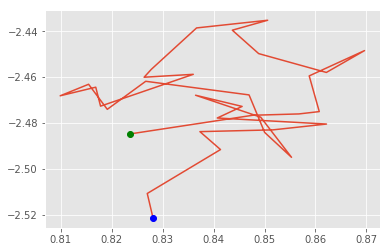

In [384]:
must = np.array(trace['mus'])
plt.plot(must[:,0,0],must[:,0,1])
plt.plot(must[0,0,0],must[0,0,1],'o',color='g')
plt.plot(must[-1,0,0],must[-1,0,1],'o',color='b')

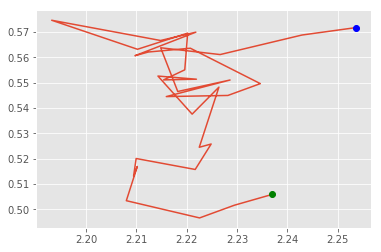

In [385]:
check = 1
must = np.array(trace['mus'])
plt.plot(must[:,check,0],must[:,check,1])
plt.plot(must[0,check,0],must[0,check,1],'o',color='g')
plt.plot(must[-1,check,0],must[-1,check,1],'o',color='b')

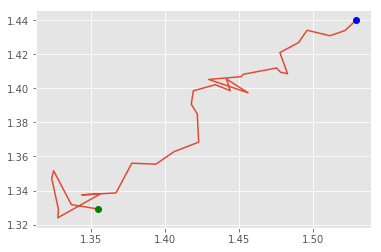

In [386]:
check = 2
must = np.array(trace['mus'])
plt.plot(must[:,check,0],must[:,check,1])
plt.plot(must[0,check,0],must[0,check,1],'o',color='g')
plt.plot(must[-1,check,0],must[-1,check,1],'o',color='b')

In [388]:
_mus

[[2, 2], [-2, -2.5], [-3, 3]]